In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_json("./vdataset.json")
data=data.sort_values("angle")
len(data)

7067

In [18]:
phases_row = xgb.XGBRegressor()
phases_row.load_model("./phases_row/regressor_phases_row.json")
data["phases_row"] = data["phases"].map(lambda x: [x[i:i+8] for i in range(0,len(x),8)][:-1])

phases_line = xgb.XGBRegressor()
phases_line.load_model("./phases_line/regressor_phases_line.json")
data["phases_line"] = data["phases"].map(lambda x: [x[i:i+4] for i in range(0,len(x),4)][:-1])

pd_row = xgb.XGBRegressor()
pd_row.load_model("./pd_row/regressor_pd_row.json")
data["pd_row"] = data["phases"].map(lambda x: [np.array(x[i:i+8])[1:]-np.array(x[i:i+8])[:-1] for i in range(0,len(x),8)][:-1]) 

pd_line_doubled = xgb.XGBRegressor()
pd_line_doubled.load_model("./pd_line_doubled/regressor_pd_line_doubled.json")
data["pd_line_doubled"] = data["phases"].map(lambda x: np.array([np.array(x[i:i+4])[1:]-np.array(x[i:i+4])[:-1] for i in range(0,len(x),4)])[:-1]) 

pd_line = xgb.XGBRegressor()
pd_line.load_model("./pd_line/regressor_pd_line.json")
data["pd_line"] = data["phases"].map(lambda x: [np.array(x[i:i+4])[1:]-np.array(x[i:i+4])[:-1] for i in range(0,len(x),4)][:-1]) 

iq_row = xgb.XGBRegressor()
iq_row.load_model("./iq_row/regressor_iq_row.json")
data["iq_row"] = data["iq"].map(lambda x: [x[i:i+8*2] for i in range(2*8,len(x),8*2)][:-1]) 

C:\Users\pedro\AppData\Local\Temp\ipykernel_22360\2801257221.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data["pd_line_doubled"] = data["phases"].map(lambda x: np.array([np.array(x[i:i+4])[1:]-np.array(x[i:i+4])[:-1] for i in range(0,len(x),4)])[:-1])


In [ ]:
fig, ax = plt.subplots(6,1,figsize=(10,25))

for index, model_row in enumerate(zip([phases_row, phases_line,pd_row,pd_line_doubled,pd_line,iq_row],
                                      ["phases_row", "phases_line","pd_row","pd_line_doubled","pd_line","iq_row"])):
    model, row_name = model_row

    results_labels= []
    results_values = []
    aoa=[]
    for row in data.iterrows():
        pred=[]
        for element in row[1][row_name]:
            pred.append(model.predict([element])[0])
        results_values.append(np.mean(pred))
        aoa.append(np.mean(row[1]["aoa"]))
        results_labels.append((row[1]["angle"]))


    ax[index].plot(np.arange(-90,90),np.arange(-90,90),"k")
    ax[index].plot(results_labels,results_values,".",alpha=0.3, linewidth=2)
    ax[index].plot(results_labels,aoa,"|", linewidth=0.5,alpha=0.1,)
    ax[index].set_title(f"Modelo: {row_name}")
    ax[index].set_ylabel(f"Ângulo previsto (º)")
    ax[index].set_xlabel(f"Ângulo de referência (º)")
    ax[index].legend(["Curva ideal", "Previsão do modelo","AoA calculado"])

plt.suptitle("Comparativo entre modelos")
plt.tight_layout()


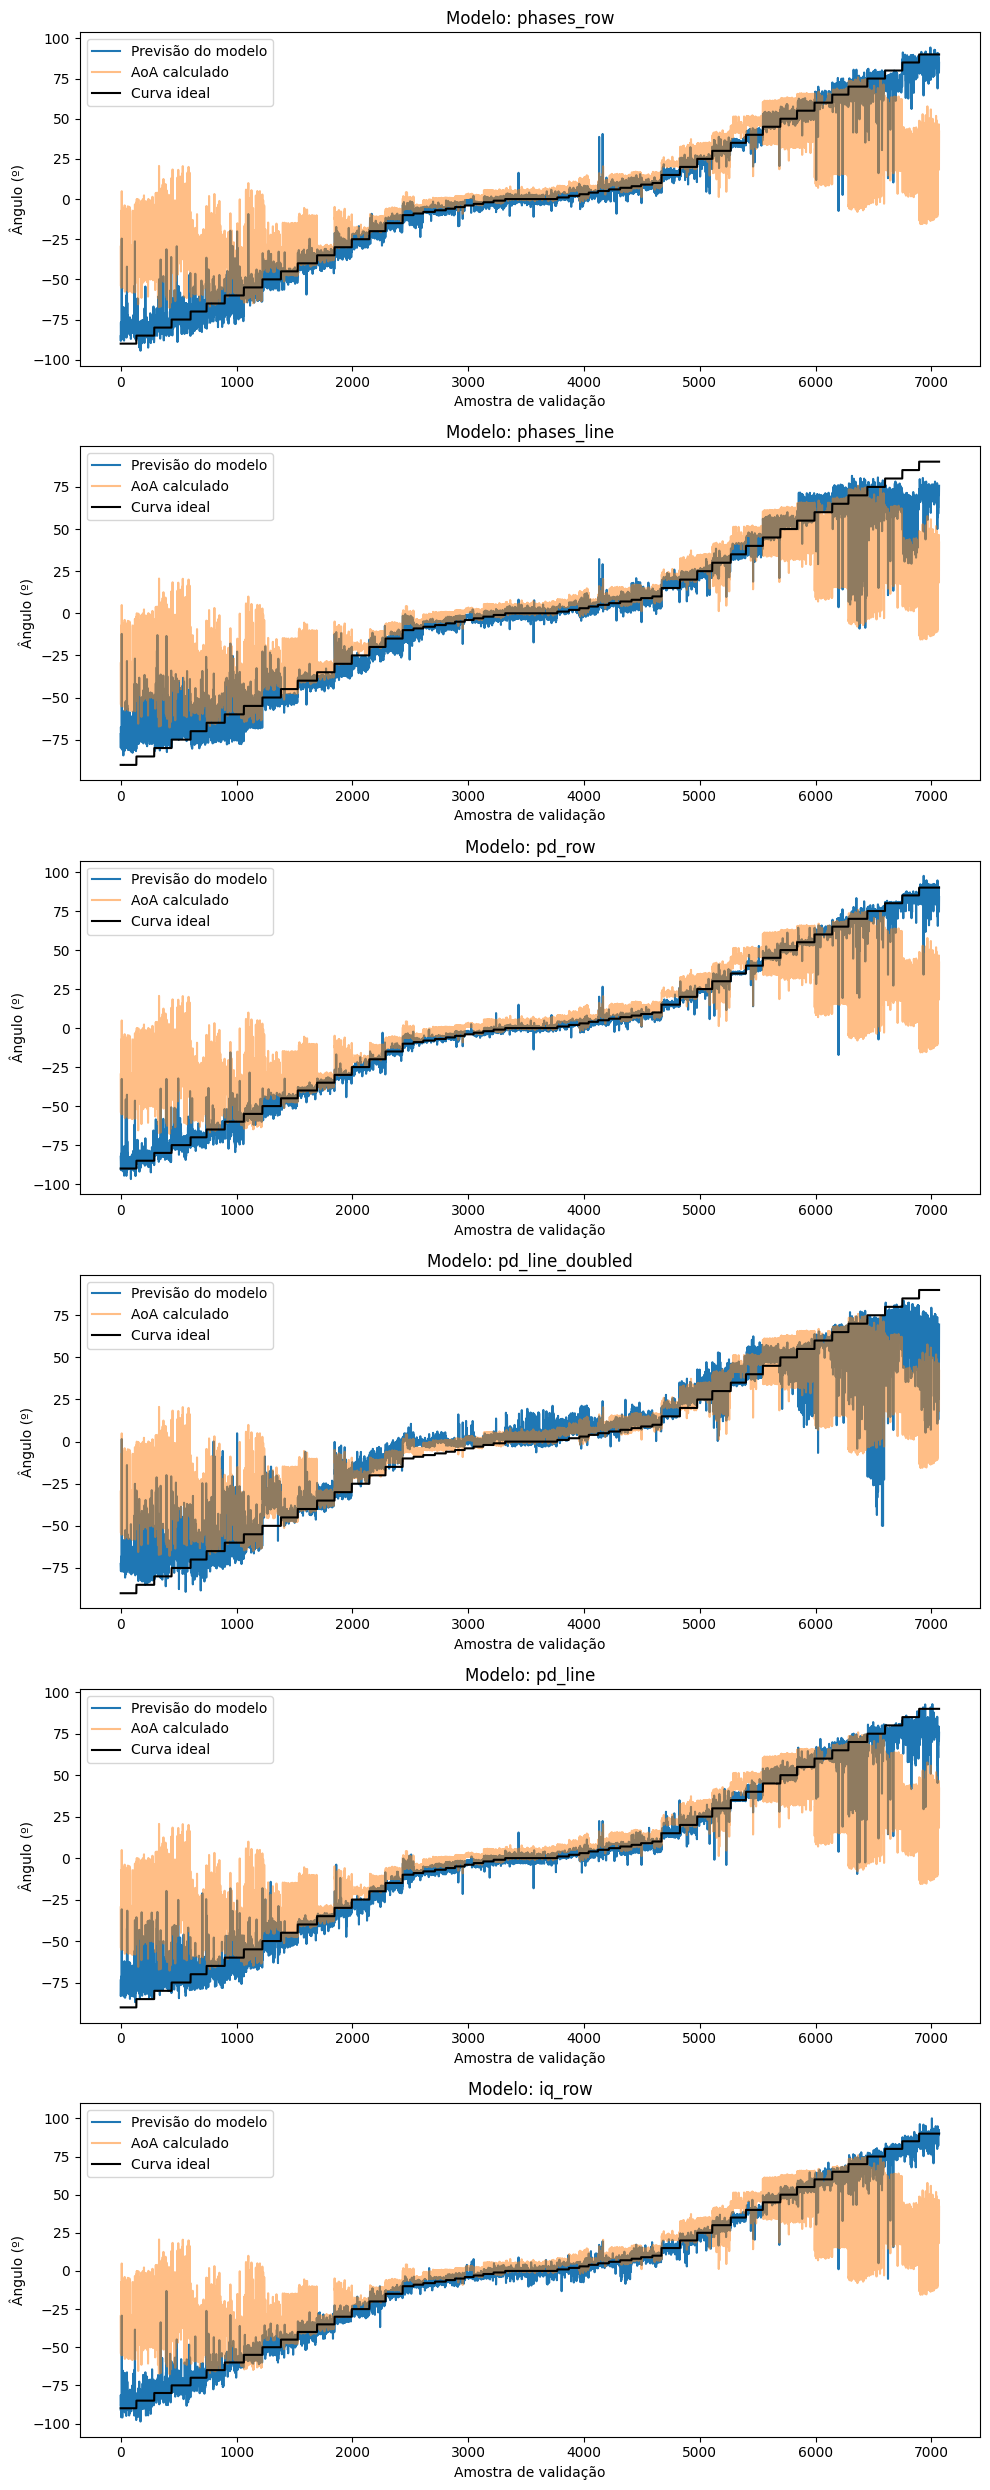

In [63]:
fig, ax = plt.subplots(6,1,figsize=(10,25))

for index, model_row in enumerate(zip([phases_row, phases_line,pd_row,pd_line_doubled,pd_line,iq_row],
                                      ["phases_row", "phases_line","pd_row","pd_line_doubled","pd_line","iq_row"])):
    model, row_name = model_row

    results_labels= []
    results_values = []
    aoa=[]
    for row in data.iterrows():
        pred=[]
        for element in row[1][row_name]:
            pred.append(model.predict([element])[0])
        results_labels.append((row[1]["angle"]))
        results_values.append(np.mean(pred))
        aoa.append(np.mean(row[1]["aoa"]))


    ax[index].plot(results_values)
    ax[index].plot(aoa, alpha=0.5)
    ax[index].plot(results_labels,"k")

    ax[index].set_title(f"Modelo: {row_name}")
    ax[index].set_ylabel(f"Ângulo (º)")
    ax[index].set_xlabel(f"Amostra de validação")
    ax[index].legend([ "Previsão do modelo","AoA calculado","Curva ideal",])

plt.tight_layout()